# Домашнее задание к лекции «Feature Selection» обновленное

Взять датасет.  
Провести EDA  
Построить зависимость между качеством модели и количеством отобранных признаков. 
Т.е. надо обучать модель на количестве признаков от одного до максимально возможного.
Для отбора признаков использовать следующие подходы:  
- корреляция признаков (на основе матрицы корреляции) и отбор по величине корреляции  
- отбор признаков на основе Information Value (см. статью) - не очень понятно, как применять для мультиклассовой классификации.
- отбор признаков на основе feature_impotance от алгоритма RandomForest  
- жадный отбор признаков по максимальному нарастанию качества модели  
- жадное отбрасывание признаков по минимальному падению качества модели  

In [326]:
from sklearn.datasets import fetch_covtype
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### Скачаем датасет:

In [327]:
dataset = fetch_covtype()

In [328]:
X = dataset.data
np.shape(X)

(581012, 54)

In [329]:
y = dataset.target
np.shape(y)

(581012,)

In [330]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 ) 

#### Описание датасета:

In [6]:
print(dataset.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional a

#### Названия признаков:

In [7]:
print(dataset.feature_names)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39']


In [8]:
feature_idx = {}
i = 0
for name in dataset.feature_names:
    feature_idx[name] = i
    i += 1
    

#### Название целевой переменной:

In [9]:
print(dataset.target_names)

['Cover_Type']


#### Исследуем данные:

Представим датасет в виде таблицы в pandas:

In [10]:
dataset_df = pd.DataFrame(X, columns = dataset.feature_names)
dataset_df[dataset.target_names] = pd.DataFrame(y)

In [11]:
dataset_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [12]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

Пропущенных значений в датасете нет.  
Все признаки выражены численно.  

In [13]:
dataset_df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [14]:
dataset_df[['Wilderness_Area_0','Wilderness_Area_1','Wilderness_Area_2','Wilderness_Area_3']].describe()

,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3
count,581012.000000,581012.000000,581012.000000,581012.000000
mean,0.448865,0.051434,0.436074,0.063627
std,0.497379,0.220882,0.495897,0.244087
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


Некоторые признаки стоит проверить на выбросы, так как максимальное значение сильно отличается от 75% квантиля. Остальные признаки выглядят нормальными.  
Рассмотрим признаки:
Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways, Horizontal_Distance_To_Fire_Points

 Slope

/home/polina/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Slope'>

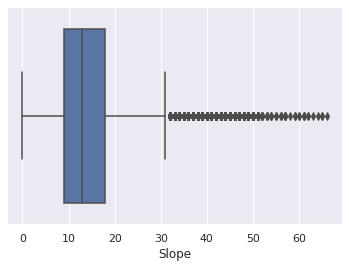

In [15]:
sns.set(font_scale=1) 
sns.boxplot(dataset_df['Slope'])

In [16]:
# Количество записей, которые можно считать cодержащими выбросы по признаку Slope:
len(dataset_df['Slope'][dataset_df['Slope']>30])

18972

In [17]:
# В процентах от общего количества:
(len(dataset_df['Slope'][dataset_df['Slope']>30])/len(dataset_df['Slope']))*100

3.265337032625832

Horizontal_Distance_To_Hydrology

/home/polina/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Horizontal_Distance_To_Hydrology'>

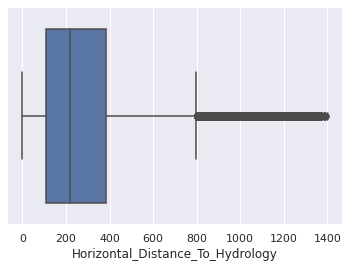

In [18]:
sns.boxplot(dataset_df['Horizontal_Distance_To_Hydrology'])

In [19]:
# Количество записей, которые можно считать cодержащими выбросы по признаку Horizontal_Distance_To_Hydrology:
len(dataset_df['Horizontal_Distance_To_Hydrology'][dataset_df['Horizontal_Distance_To_Hydrology']>800])

14296

In [20]:
# В процентах от общего количества:
(len(dataset_df['Horizontal_Distance_To_Hydrology'][dataset_df['Horizontal_Distance_To_Hydrology']>800])/len(dataset_df['Horizontal_Distance_To_Hydrology']))*100

2.4605343779474436

Vertical_Distance_To_Hydrology

/home/polina/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Vertical_Distance_To_Hydrology'>

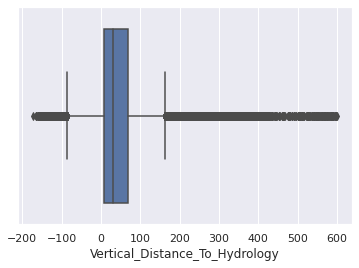

In [21]:
sns.boxplot(dataset_df['Vertical_Distance_To_Hydrology'])

In [22]:
# Количество записей, которые можно считать cодержащими выбросы по признаку Vertical_Distance_To_Hydrology:
len(dataset_df['Vertical_Distance_To_Hydrology'][(dataset_df['Vertical_Distance_To_Hydrology']>180)|(dataset_df['Vertical_Distance_To_Hydrology']<-100)])

22819

In [23]:
# В процентах от общего количества:
((len(dataset_df['Vertical_Distance_To_Hydrology'][(dataset_df['Vertical_Distance_To_Hydrology']>180)|(dataset_df['Vertical_Distance_To_Hydrology']<-100)]))/len(dataset_df['Vertical_Distance_To_Hydrology']))*100

3.927457608448707

Horizontal_Distance_To_Roadways

/home/polina/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Horizontal_Distance_To_Roadways'>

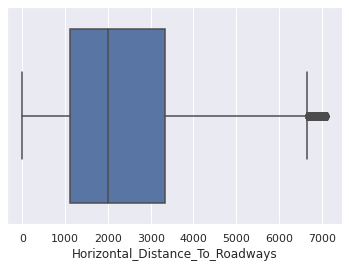

In [24]:
sns.boxplot(dataset_df['Horizontal_Distance_To_Roadways'])

In [25]:
# Количество записей, которые можно считать cодержащими выбросы по признаку Vertical_Distance_To_Hydrology:
len(dataset_df['Horizontal_Distance_To_Roadways'][(dataset_df['Horizontal_Distance_To_Roadways']>6700)])

553

In [26]:
# В процентах от общего количества:
((len(dataset_df['Horizontal_Distance_To_Roadways'][(dataset_df['Horizontal_Distance_To_Roadways']>6700)]))/len(dataset_df['Horizontal_Distance_To_Roadways']))*100

0.09517875706525855

Horizontal_Distance_To_Fire_Points

/home/polina/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Horizontal_Distance_To_Fire_Points'>

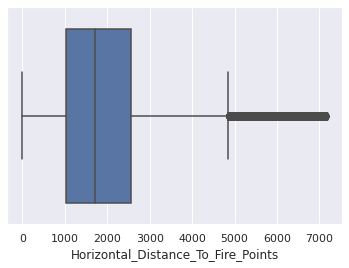

In [27]:
sns.boxplot(dataset_df['Horizontal_Distance_To_Fire_Points'])

In [28]:
# Количество записей, которые можно считать cодержащими выбросы по признаку Vertical_Distance_To_Hydrology:
len(dataset_df['Horizontal_Distance_To_Fire_Points'][(dataset_df['Horizontal_Distance_To_Fire_Points']>5000)])

27895

In [29]:
# В процентах от общего количества:
(len(dataset_df['Horizontal_Distance_To_Fire_Points'][(dataset_df['Horizontal_Distance_To_Fire_Points']>5000)])/len(dataset_df['Horizontal_Distance_To_Fire_Points']))*100

4.801105657026017

Количество записей с предполагаемыми выбросами по разным признакам даже в сумме не велико. Это можно учитывать далее при обучении модели (от части данных можно избавиться).

## Отбор признаков

### Oтбор признаков по корреляции признаков (на основе матрицы корреляции) и отбор по величине корреляции

Построим матрицу корреляции.
С помощью матрицы корреляций можно выявлять ярко выраженные корреляции и отбирать признаки так, чтобы они сильно коррелировали с таргетной переменной и слабо коррелировали между собой.

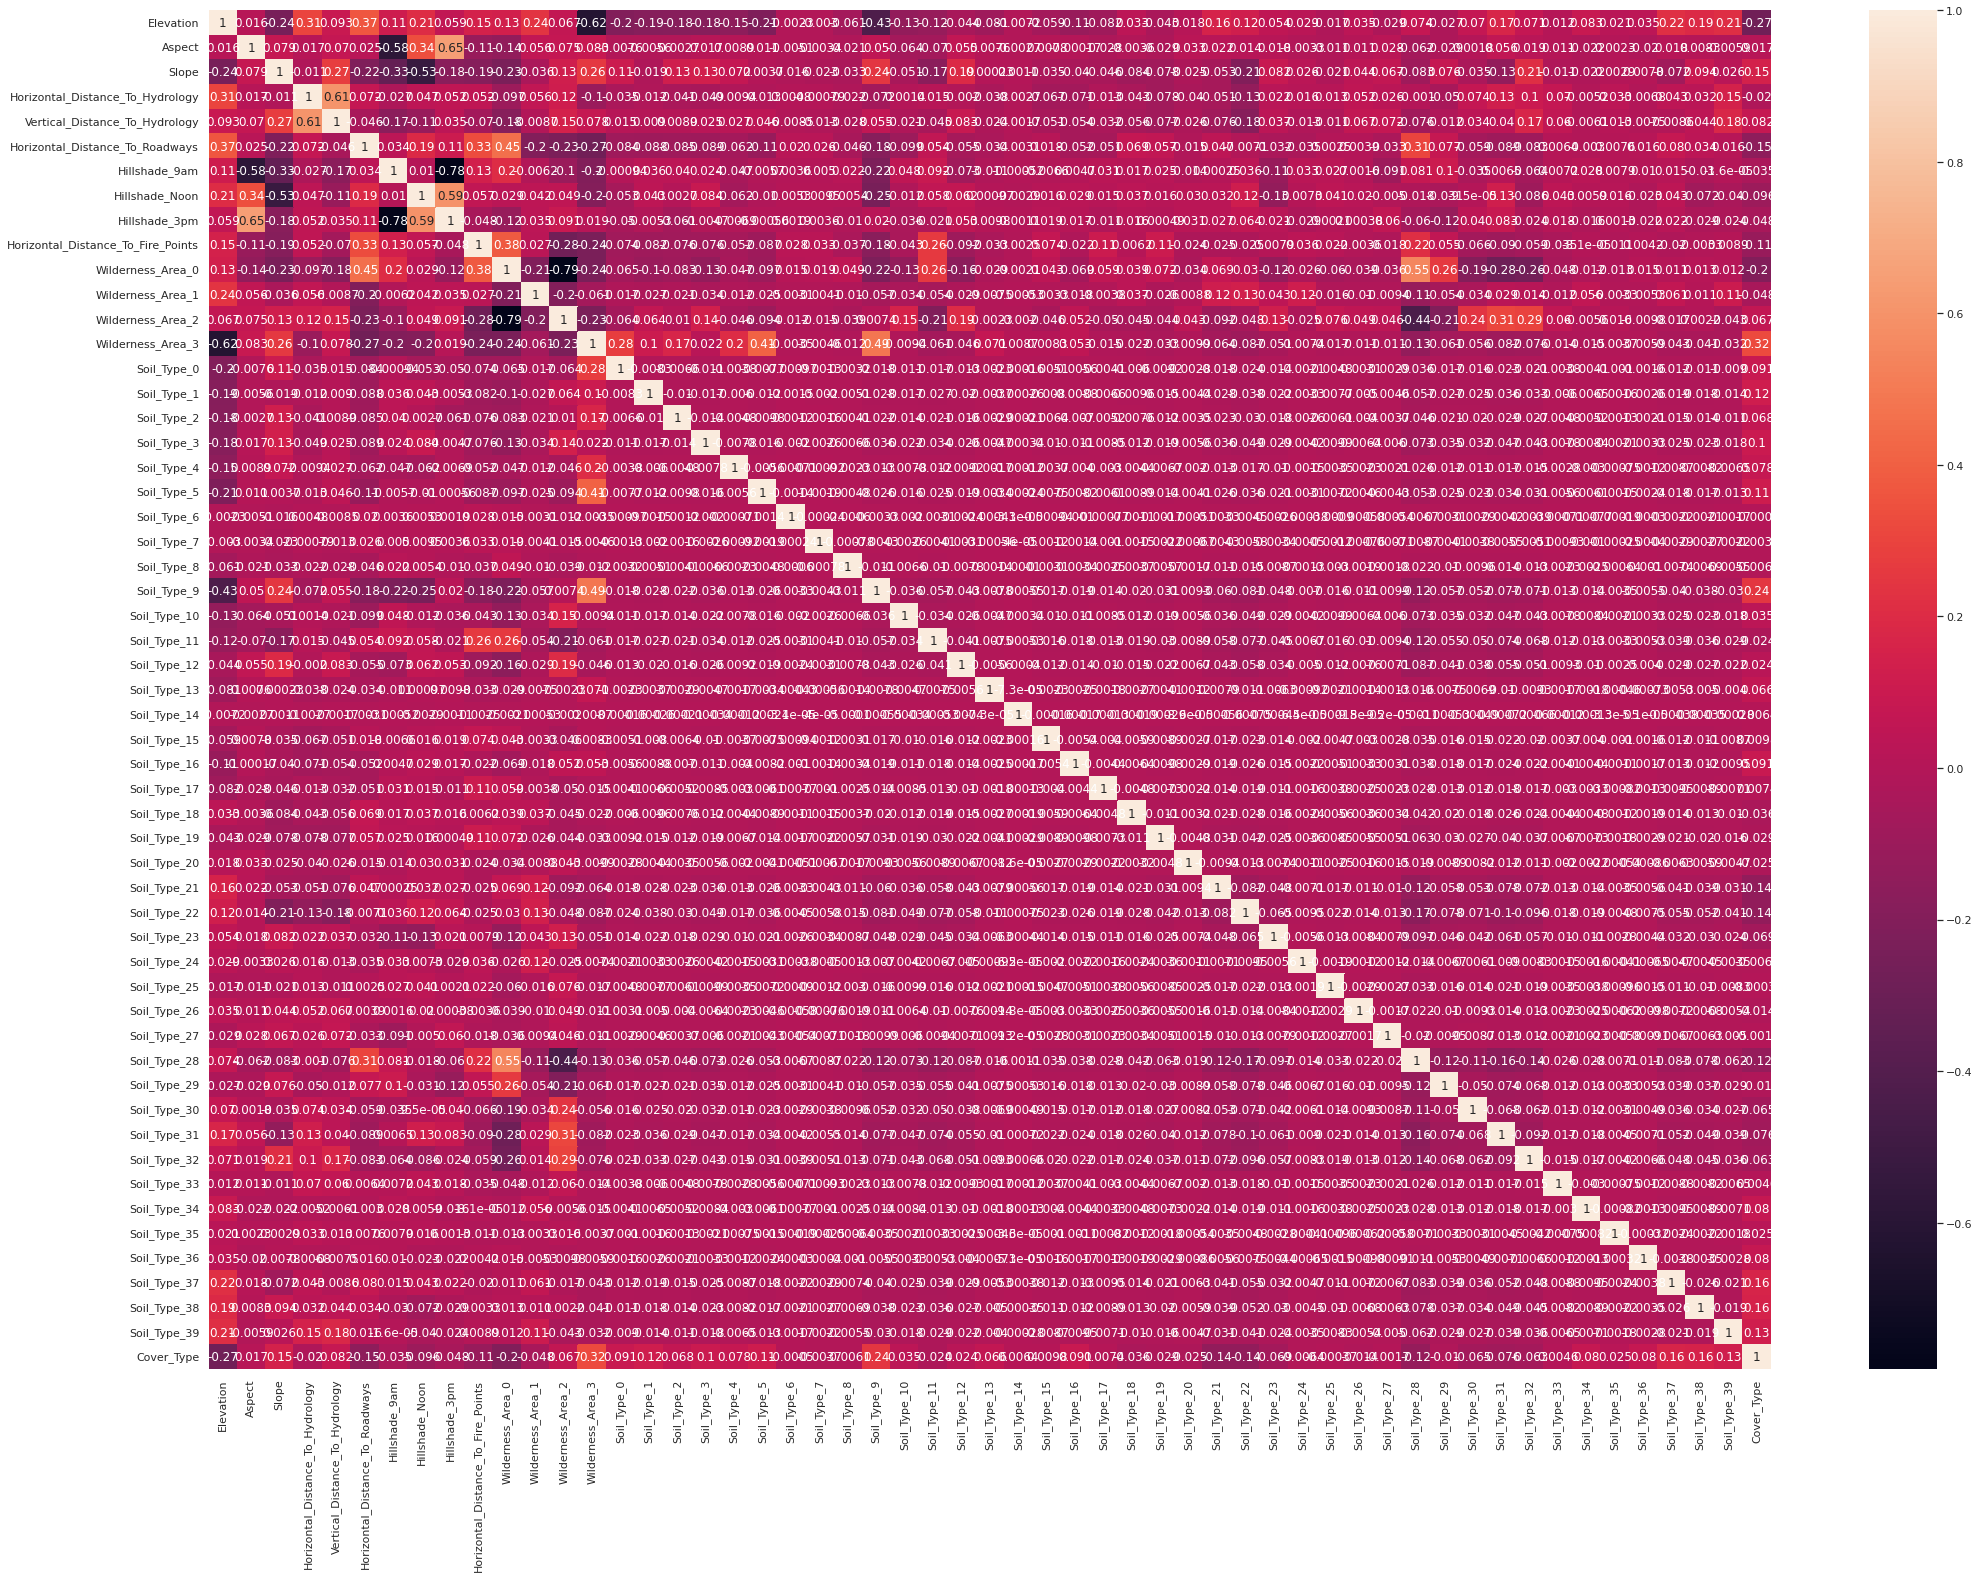

In [30]:
corr = dataset_df.corr()
plt.figure(figsize=(35,25))
sns.heatmap(corr,annot=True)
plt.show()

In [31]:
sorted_corr = corr['Cover_Type'].sort_values(ascending=False)
sorted_corr

Cover_Type                            1.000000
Wilderness_Area_3                     0.323200
Soil_Type_9                           0.243876
Soil_Type_37                          0.160170
Soil_Type_38                          0.155668
Slope                                 0.148285
Soil_Type_39                          0.128351
Soil_Type_1                           0.118135
Soil_Type_5                           0.112958
Soil_Type_3                           0.099672
Soil_Type_0                           0.090828
Soil_Type_16                          0.090582
Vertical_Distance_To_Hydrology        0.081664
Soil_Type_34                          0.080315
Soil_Type_36                          0.080271
Soil_Type_4                           0.077890
Soil_Type_2                           0.068064
Wilderness_Area_2                     0.066846
Soil_Type_13                          0.065562
Soil_Type_10                          0.035379
Soil_Type_35                          0.025397
Soil_Type_12 

In [48]:
feature_ordered = {}
for i in range(0,len(sorted_corr)):
    feature_ordered[i] = sorted_corr.index[i]
    

 #### Построим простую модель классификации на основе дерева решений с учетом всех признаков:

In [49]:
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.7774004038920507

Наиболее сильно коррелирующий с таргетной переменной признак - это признак Wilderness_Area_3.
Построим модель только с учетом этого признака.

In [50]:
X_t_1 = X_train[:,feature_idx['Wilderness_Area_3']]
X_t_1 = X_t_1.reshape(-1, 1)
X_test_1 = X_test[:,feature_idx['Wilderness_Area_3']]
X_test_1 = X_test_1.reshape(-1, 1)

In [51]:
#X_t = dataset_df['Wilderness_Area_3']
clf1 = DecisionTreeClassifier(max_depth=10)
clf1.fit(X_t_1, y_train)
clf1.score(X_test_1,y_test)

0.5193627225995961

Качество заметно ниже.  
Теперь будем по одному добавлять признаки по мере уменьшения корреляции с целевой переменной и считать score.  

In [113]:
def number_to_score(feature_order):
    scores = {}
    feature_list = []
    k = 0
    for i in range(0,(len(feature_order))):
        feature_list = []
        if i > -1:
            for k in range(0,i+1):
                if feature_order[k] != 'Cover_Type':
                    feature_list.append(feature_idx[feature_order[k]])

            if feature_list != []:
                X_train_1 = X_train[:,feature_list]
                X_test_1 = X_test[:,feature_list]

                clf1 = DecisionTreeClassifier(max_depth=7)
                clf1.fit(X_train_1, y_train)
                scores[i+1] = clf1.score(X_test_1,y_test)
    return scores

In [114]:
scores_list = number_to_score(feature_ordered)

Text(0, 0.5, 'Качество')

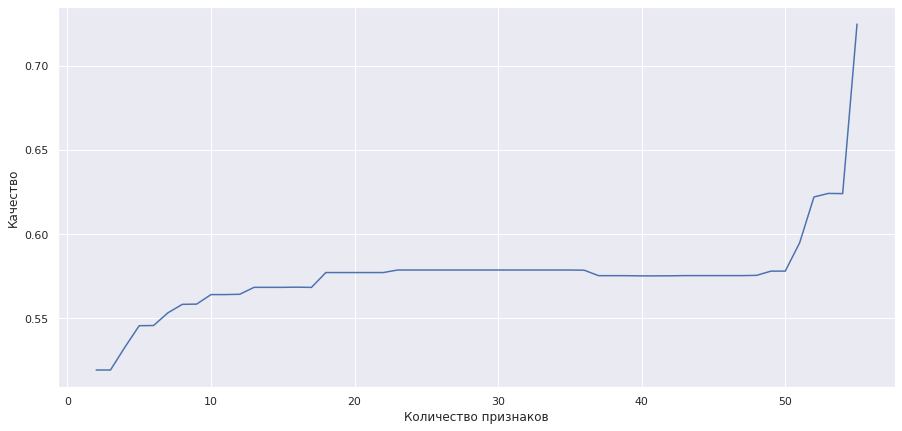

In [115]:
plt.figure(figsize=(15,7))
plt.plot(scores_list.keys(),scores_list.values())
plt.xlabel('Количество признаков')
plt.ylabel('Качество')

### Отбор признаков на основе feature_importance от алгоритма RandomForest 

In [154]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
model = RandomForestClassifier()
model.fit(X_train, y_train) # обучение

RandomForestClassifier()

In [175]:
feature_importances = {}

In [176]:
for i in range(len(dataset.feature_names)):
    feature_importances[dataset.feature_names[i]] = model.feature_importances_[i]

In [177]:
feature_importances = dict(sorted(feature_importances.items(), key=lambda item: item[1],reverse = True))

In [178]:
feature_importances

{'Elevation': 0.2450106313545028,
 'Horizontal_Distance_To_Roadways': 0.11656635564127424,
 'Horizontal_Distance_To_Fire_Points': 0.10991686659969994,
 'Horizontal_Distance_To_Hydrology': 0.060657930629256465,
 'Vertical_Distance_To_Hydrology': 0.05781709935394854,
 'Aspect': 0.04793204590811321,
 'Hillshade_Noon': 0.043704526784612764,
 'Hillshade_3pm': 0.04174749261074401,
 'Hillshade_9am': 0.041446250113345434,
 'Slope': 0.033502260515571015,
 'Wilderness_Area_3': 0.030557284220932433,
 'Soil_Type_21': 0.015136020889239502,
 'Wilderness_Area_2': 0.012806170253286099,
 'Soil_Type_3': 0.011994897167363978,
 'Wilderness_Area_0': 0.011120966374943173,
 'Soil_Type_22': 0.01085268769113448,
 'Soil_Type_9': 0.010769129638913202,
 'Soil_Type_38': 0.009790314828203446,
 'Soil_Type_37': 0.009755903994679743,
 'Soil_Type_1': 0.009081705711620619,
 'Soil_Type_11': 0.008433474643824677,
 'Soil_Type_31': 0.005659033959880515,
 'Soil_Type_39': 0.005444067837090573,
 'Soil_Type_28': 0.0053083844319

In [187]:
feature_ordered = {}
i = 0

In [188]:
for key in list(feature_importances.keys()):
    feature_ordered[i] = key
    i += 1
    

In [189]:
scores_list = number_to_score(feature_ordered)

Text(0, 0.5, 'Качество')

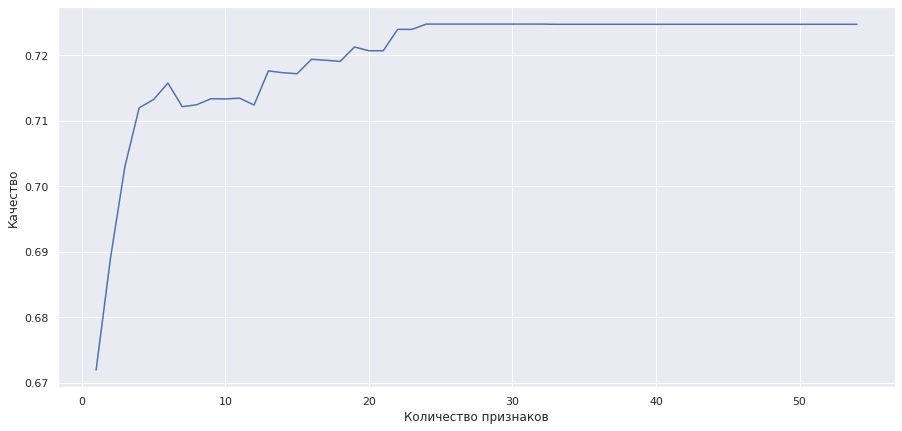

In [198]:
plt.figure(figsize=(15,7))
plt.plot(list(scores_list.keys())[:],list(scores_list.values())[:])
plt.xlabel('Количество признаков')
plt.ylabel('Качество')

In [205]:
print(scores_list)

{1: 0.6719581879933909, 2: 0.6890145951900128, 3: 0.7029844409766844, 4: 0.7120031668808519, 5: 0.7132595924362034, 6: 0.7157781806498991, 7: 0.712175279970626, 8: 0.7124678722232421, 9: 0.7133858087020378, 10: 0.7133571231870754, 11: 0.713471865246925, 12: 0.7124277125022949, 13: 0.7176370020194602, 14: 0.717367358178814, 15: 0.7172067192950248, 16: 0.7194097668441344, 17: 0.7192663392693226, 18: 0.7190884890765559, 19: 0.7212915366256655, 20: 0.7207178263264182, 21: 0.7207178263264182, 22: 0.7239822379291353, 23: 0.7239822379291353, 24: 0.724791169451074, 25: 0.724791169451074, 26: 0.724791169451074, 27: 0.724791169451074, 28: 0.724791169451074, 29: 0.724791169451074, 30: 0.724791169451074, 31: 0.724791169451074, 32: 0.724791169451074, 33: 0.7247567468331192, 34: 0.7247567468331192, 35: 0.7247567468331192, 36: 0.7247567468331192, 37: 0.7247567468331192, 38: 0.7247567468331192, 39: 0.7247567468331192, 40: 0.7247567468331192, 41: 0.7247567468331192, 42: 0.7247567468331192, 43: 0.724756

Интересно, что добавление признаков начиная с 33го не улучшало качество модели. Это касается следующих признаков:

In [206]:
print(list(feature_importances.keys())[33:])

['Soil_Type_19', 'Soil_Type_16', 'Soil_Type_34', 'Soil_Type_0', 'Soil_Type_18', 'Soil_Type_15', 'Soil_Type_20', 'Soil_Type_26', 'Soil_Type_33', 'Soil_Type_4', 'Soil_Type_36', 'Soil_Type_25', 'Soil_Type_13', 'Soil_Type_17', 'Soil_Type_24', 'Soil_Type_27', 'Soil_Type_8', 'Soil_Type_35', 'Soil_Type_7', 'Soil_Type_6', 'Soil_Type_14']


#### Жадный отбор признаков по максимальному нарастанию качества модели 

In [275]:
feature_idx_reducing = feature_idx.copy()
score_to_num = {}
feature_list_full = []
max_score = 0

In [276]:
for i in range(0,len(feature_idx)):
    
    #max_score = 0 
    feature_chosen = ''
    
    for key,value in feature_idx_reducing.items():
    
        feature_list = feature_list_full.copy()
        feature_list.append(value)

        X_train_1 = X_train[:,feature_list]
        X_test_1 = X_test[:,feature_list]

        if len(feature_list) < 2:
            X_train_1 = X_train_1.reshape(-1, 1)
            X_test_1 = X_test_1.reshape(-1, 1)

        clf = DecisionTreeClassifier(max_depth=7)
        clf.fit(X_train_1, y_train)
        score = clf.score(X_test_1,y_test)
        
        if score > max_score:
            max_score = score
            feature_chosen = value
            feature_chosen_key = key
            score_to_num[len(feature_list)] = max_score
    
    if feature_chosen == '':
        print(f'Score is not growing. Max score is {max_score}. Number of features is {len(feature_list)}')
        break
    else:
        feature_list_full.append(feature_chosen)
        feature_idx_reducing.pop(feature_chosen_key)


Score is not growing. Max score is 0.7299775105562695. Number of features is 19


Получается, после 19го признака качество перестало расти. Финальный набор признаков:

In [282]:
feature_list_full

[0, 5, 3, 9, 17, 1, 23, 15, 36, 10, 45, 11, 16, 13, 4, 48, 29, 2]

Text(0, 0.5, 'Качество')

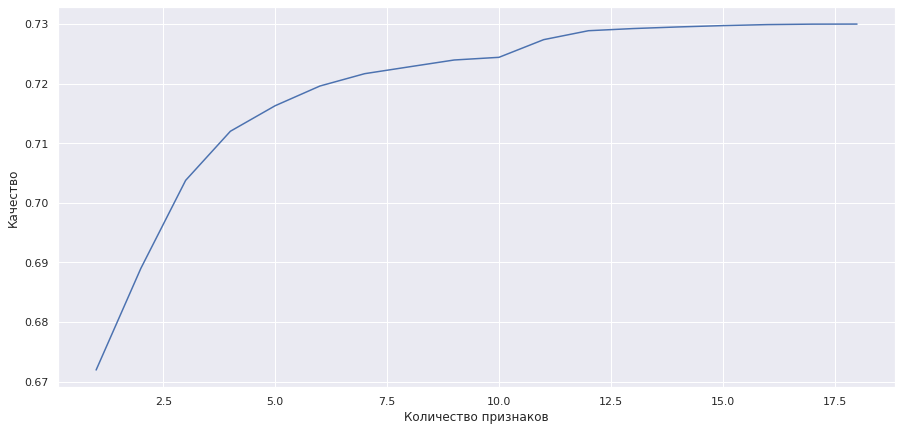

In [277]:
plt.figure(figsize=(15,7))
plt.plot(list(score_to_num.keys())[:],list(score_to_num.values())[:])
plt.xlabel('Количество признаков')
plt.ylabel('Качество')

#### Жадное отбрасывание признаков по минимальному падению качества модели 

In [319]:
feature_idx_reducing = feature_idx.copy()
score_to_num = {}
feature_list_full = list(feature_idx.values())
prev_score = 0
delta_score = 1e-3
score = 0
max_score = 0

In [320]:
for i in range(0,len(feature_idx)):
    
    #max_score = 0 
    feature_chosen = ''
    
    prev_score = max_score
    max_score = 0
    
    for key,value in feature_idx_reducing.items():
        

        feature_list = feature_list_full.copy()
        feature_list.remove(value)

        X_train_1 = X_train[:,feature_list]
        X_test_1 = X_test[:,feature_list]

        if len(feature_list) < 2:
            X_train_1 = X_train_1.reshape(-1, 1)
            X_test_1 = X_test_1.reshape(-1, 1)

        clf = DecisionTreeClassifier(max_depth=7)
        clf.fit(X_train_1, y_train)
        score = clf.score(X_test_1,y_test)
        
        if score > max_score:
            
            feature_chosen = value
            feature_chosen_key = key
            max_score = score
            score_to_num[len(feature_list)] = max_score

    
    if prev_score - max_score > delta_score:
        print(f'Score is remarkably reducing. Number of features is {len(feature_list)}')
        break
    else:
        if feature_chosen != '':
            feature_list_full.remove(feature_chosen)
            feature_idx_reducing.pop(feature_chosen_key)

Score is remarkably reducing. Number of features is 12


Text(0, 0.5, 'Качество')

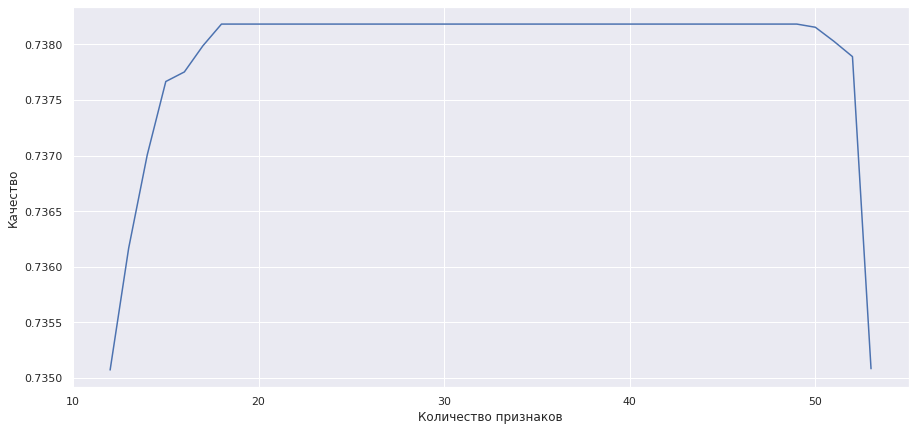

In [348]:
plt.figure(figsize=(15,7))
keys = list(score_to_num.keys())
values = list(score_to_num.values())
plt.plot(keys,values)
plt.xlabel('Количество признаков')
plt.ylabel('Качество')

В качестве порогового значения допустимого снижения качества при удалении признака было выбрано значение delta_score = 1e-3. При этом отбор остановился, когда осталось 12 признаков. А именно:

In [325]:
feature_idx_reducing

{'Elevation': 0,
 'Vertical_Distance_To_Hydrology': 4,
 'Horizontal_Distance_To_Roadways': 5,
 'Horizontal_Distance_To_Fire_Points': 9,
 'Wilderness_Area_2': 12,
 'Soil_Type_1': 15,
 'Soil_Type_3': 17,
 'Soil_Type_9': 23,
 'Soil_Type_12': 26,
 'Soil_Type_21': 35,
 'Soil_Type_22': 36,
 'Soil_Type_23': 37,
 'Soil_Type_31': 45}